In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('Country-data (1).csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
data.drop('country', axis=1, inplace = True)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
df= data.copy()
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [12]:
X = df.values
X

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

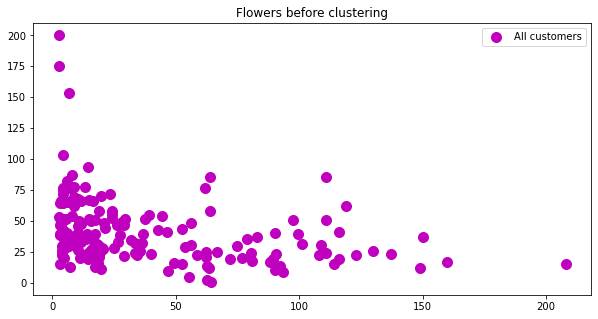

In [13]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='m',label='All customers')
plt.title('Flowers before clustering')
plt.legend()
plt.show()

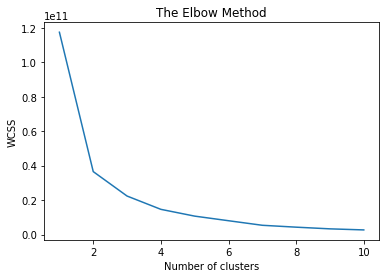

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()





In [15]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)





For n_clusters = 2 The average silhouette_score is : 0.7256314906273207
For n_clusters = 3 The average silhouette_score is : 0.7106457354531156
For n_clusters = 4 The average silhouette_score is : 0.6109297437247547
For n_clusters = 5 The average silhouette_score is : 0.5710071705649711
For n_clusters = 6 The average silhouette_score is : 0.5894073732527259
For n_clusters = 7 The average silhouette_score is : 0.5944253756384579
For n_clusters = 8 The average silhouette_score is : 0.5964827694227414


In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [20]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [21]:
kmeans.cluster_centers_

array([[4.73898437e+01, 3.58656172e+01, 6.33203125e+00, 4.59216086e+01,
        8.56924219e+03, 8.95764844e+00, 6.78734375e+01, 3.26335938e+00,
        4.43839063e+03],
       [8.73428571e+00, 5.52400000e+01, 8.49028571e+00, 4.87171429e+01,
        4.09085714e+04, 3.88914286e+00, 7.91714286e+01, 1.92657143e+00,
        3.59771429e+04],
       [4.87500000e+00, 8.52500000e+01, 7.64000000e+00, 6.19000000e+01,
        8.36250000e+04, 4.21675000e+00, 8.10000000e+01, 1.79250000e+00,
        8.44250000e+04]])

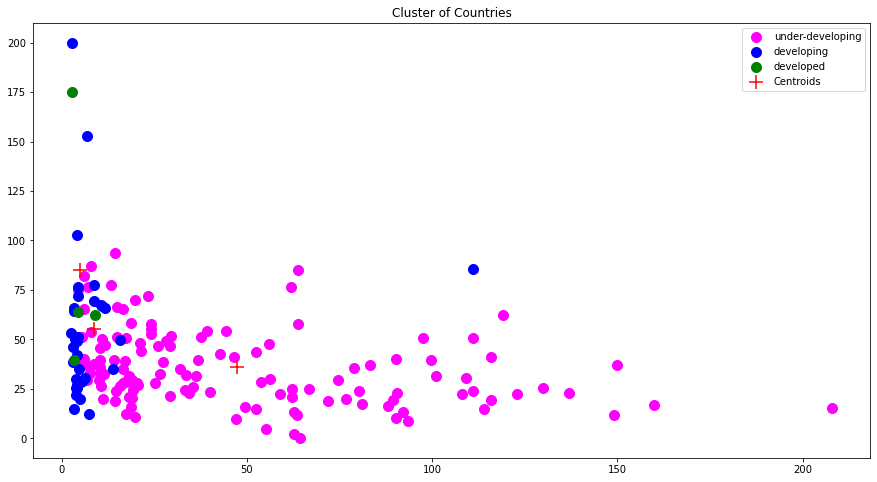

In [22]:
#Lets plot those clusters!
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='under-developing')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='developing')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='developed')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Countries')
plt.legend()
plt.show()

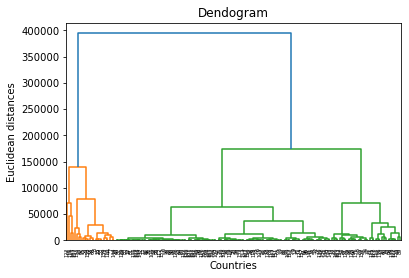

In [25]:
# import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

In [26]:
# from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [27]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

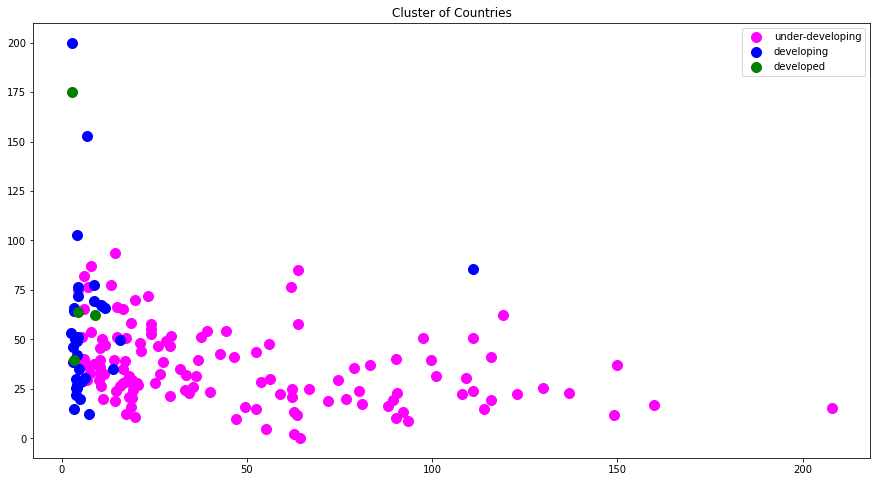

In [28]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='under-developing')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='developing')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='developed')
plt.title('Cluster of Countries')
plt.legend()
plt.ioff()
plt.show()

In [30]:
X = df.drop('gdpp',axis=1).values
y = df[['gdpp']].values

In [32]:
y

array([[   553],
       [  4090],
       [  4460],
       [  3530],
       [ 12200],
       [ 10300],
       [  3220],
       [ 51900],
       [ 46900],
       [  5840],
       [ 28000],
       [ 20700],
       [   758],
       [ 16000],
       [  6030],
       [ 44400],
       [  4340],
       [   758],
       [  2180],
       [  1980],
       [  4610],
       [  6350],
       [ 11200],
       [ 35300],
       [  6840],
       [   575],
       [   231],
       [   786],
       [  1310],
       [ 47400],
       [  3310],
       [   446],
       [   897],
       [ 12900],
       [  4560],
       [  6250],
       [   769],
       [   334],
       [  2740],
       [  8200],
       [  1220],
       [ 13500],
       [ 30800],
       [ 19800],
       [ 58000],
       [  5450],
       [  4660],
       [  2600],
       [  2990],
       [ 17100],
       [   482],
       [ 14600],
       [  3650],
       [ 46200],
       [ 40600],
       [  8750],
       [   562],
       [  2960],
       [ 41800

In [33]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [36]:
explained_variance

array([0.43637045, 0.20443745])

In [37]:
X_train

array([[ 2.75132143e-01, -6.16497844e-01],
       [ 2.08762735e+00, -9.46491902e-01],
       [ 1.13906576e+00, -2.16332724e-01],
       [-2.93453659e+00,  9.42911120e-01],
       [ 8.77409845e-01,  3.10024189e-01],
       [-6.21270744e-01, -1.74157561e-01],
       [ 1.03414602e+00, -1.07558394e+00],
       [ 1.26401501e+00,  5.74766293e-01],
       [ 1.80756517e+00, -6.37277877e-01],
       [ 5.07462058e-01,  4.89751772e-01],
       [-4.49688613e+00,  2.00942398e+00],
       [-4.65402261e-01,  1.20935647e+00],
       [-2.49247941e+00,  1.32140541e+00],
       [ 1.47697785e+00, -1.64781058e+00],
       [ 1.49629628e-02, -2.22474634e+00],
       [ 1.42979196e-02, -1.37776755e+00],
       [ 1.53893898e+00,  1.37901947e+00],
       [ 1.27210059e+00, -8.79587919e-01],
       [ 1.27197937e+00, -5.06015236e-01],
       [-1.18853141e+00, -7.80177665e-01],
       [-2.63929617e-01,  7.49598662e-01],
       [ 1.60777946e+00,  4.74779024e-01],
       [-1.79589457e+00,  1.06556955e-01],
       [-2.

In [38]:
X_test

array([[-1.82098188,  0.97512945],
       [-2.10936402,  0.29583709],
       [ 2.89994148, -0.10684123],
       [ 1.45168085, -1.93571526],
       [ 1.13340444,  0.17118417],
       [ 1.83865187,  0.75614846],
       [ 1.42015919, -2.05258972],
       [-0.08362027, -1.75106352],
       [ 1.37189132, -0.514017  ],
       [ 2.23629183, -0.06776021],
       [ 1.61582956, -1.97618397],
       [-2.97164743,  0.3981388 ],
       [ 0.57055163, -0.24809729],
       [-0.12656152, -0.01149502],
       [ 3.23046328,  1.48190128],
       [-0.14673582, -0.97883906],
       [ 1.09427424, -1.15772874],
       [-3.4417304 ,  0.77829794],
       [ 1.60895725, -1.95327028],
       [ 1.44585962,  0.74993541],
       [-1.87226476, -1.5965562 ],
       [-2.85185269,  1.0389399 ],
       [-2.4612308 , -0.90210897],
       [-1.81238304,  0.04919575],
       [-1.50302514,  0.4419024 ],
       [-0.56621132, -0.19113809],
       [-2.91225763, -0.20723636],
       [-2.35165576, -0.57499644],
       [-0.23973937,

In [39]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/kanan100/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
y_pred

array([ 1310,  1310, 74600, 48400, 19300,  9070, 48400, 10700, 19300,
       74600, 48400,  1310, 19300,  1310, 44400, 10700, 10700,  2330,
       48400,  9070,   758,  1310,   758,  1310,  1310,  1310,   758,
         758,  1310, 10700, 74600,  1310, 48400,  1310])

In [44]:
accuracy_score(y_test, y_pred)

0.029411764705882353

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

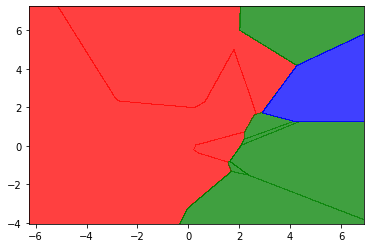

In [45]:
# Visualising the Training set results

X_set, y_set = X_train, y_train
#minimum və maximum dəyərlərin köməyi ilə x1 və x2 (PCA1 və (PCA2) oxlarının aralığı təyin olunur)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

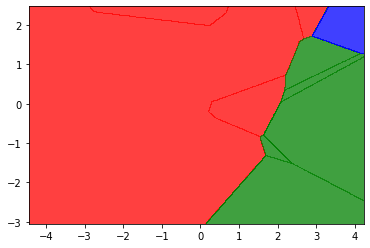

In [46]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()